# Betrouwbaarheidsintervallen

Onderzoeksvragen:

* Kunnen we statistisch conclusies trekken over bepaalde eigenschappen van een toevalsveranderlijke $X$?
* Kunnen we bepaalde grenzen berekenen waarbinnen deze eigenschappen vallen?
* Wat beïnvloedt deze grenzen?
* Welke conclusie kunnen we dan trekken?

## Testen van 1 laptop

We testen het "gemiddelde" verbruik van 1 laptop.

<u>Toevalsveranderdelijke</u>:

$X$ = "Het verbruik van laptops"

Stel dat we weten dat het verbruik van laptops normaal verdeeld is:
* populatiegemiddelde $\mu = 40$ Watt
* standaardafwijking is $\sigma = 20$ Watt

Dus $X \sim N(\mu, \sigma²)$

Wat is de kans dat het verbruik tussen x en y ligt?

Wat is de kans dat het verbruik tussen $\mu - 1\cdot\sigma$ en $\mu + 1\cdot\sigma$ ligt?
Wat is de kans dat het verbruik tussen $\mu - 2\cdot\sigma$ en $\mu + 2\cdot\sigma$ ligt?
Wat is de kans dat het verbruik tussen $\mu - 3\cdot\sigma$ en $\mu + 3\cdot\sigma$ ligt?

Kans op verbruik tussen 20 en 30 is 0.150
Kans op verbruik tussen 30 en 50 is 0.383
Kans op verbruik tussen 0 en 80 is 0.954


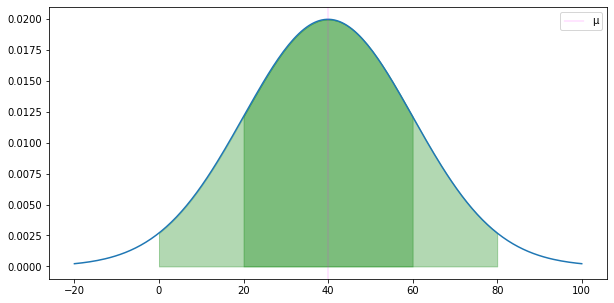

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

μ = 40
σ = 20

verbruik = norm(loc=μ, scale=σ)
x = np.linspace(μ - 3 * σ, μ + 3 * σ, 200)

a = np.linspace(μ - 2 * σ, μ + 2 * σ)
b = np.linspace(μ - 1 * σ, μ + 1 * σ)
# c = np.linspace(20,30,200)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(x, verbruik.pdf(x))
ax.axvline(x=μ, color='magenta', label='µ', linewidth=0.2)
ax.fill_between(a, verbruik.pdf(a), edgecolor='black', color='green', alpha=0.3)
ax.fill_between(b, verbruik.pdf(b), edgecolor='black', color='green', alpha=0.3)
# ax.fill_between(c, verbruik.pdf(c), edgecolor='black', color='green', alpha=0.3)

ax.legend()

print("Kans op verbruik tussen 20 en 30 is {:.3f}".format(verbruik.cdf(30) - verbruik.cdf(20)))
print("Kans op verbruik tussen 30 en 50 is {:.3f}".format(verbruik.cdf(50) - verbruik.cdf(30)))
print("Kans op verbruik tussen 0 en 80 is {:.3f}".format(verbruik.cdf(80) - verbruik.cdf(0)))

## Conclusie

We kunnen weinig zinvolle uitspraken doen over het gemiddelde verbruik van de laptops, want de grenzen liggen te ver uit elkaar.


$\Rightarrow$ we moeten meer laptops testen!

# Wat is een steekproef echt?

Een steekproef is een toevalsexperiment (cfr. het gooien van een dobbelsteen).
Een toevalsexperiment heeft een toevalsveranderlijke ...

Een steekproef heeft bepaalde eigenschappen zoals bv:
* een gemiddelde $\bar{x}$
* een standaardafwijking $s$
* ...

Kunnen we **statitische uitspraken** doen over de **eigenschappen** van zo'n verdeling?

Ja, dat kunnen we!
Op voorwaarde dat we de **verdeling** kennen van _die eigenschap_ van de steekproef.

## Gemiddelden van veel steekproeven

Stel dat we véél steekproeven doen op eenzelfde dataset.
Bijvoorbeeld we sturen $n$ enquête-teams de baan op en laten hen een bepaalde steekproef doen onder de bevolking.

Dan heeft elke steekproef van de enquête-teams een eigen steekproefgemiddelden $\bar{x_i}$, en dus allemaal te samen is dit:

\
$\bar{x_1},\bar{x_2},\ldots,\bar{x_n}$

We kunnen ons nu de vraag stellen:
> "Hoe zijn deze steekproefgemiddelden *zelf* verdeeld?"

We noteren deze toevalsveranderlijke met een speciale notatie (die verder geen speciale betekenis heeft)

$\bar{X}$ = "Het steekproefgemiddelde van een steekproef"

## Centrale limietstelling

Volgens de centrale limietstelling zijn deze steekproefgemiddelden **normaal verdeeld** met parameters
* $\mu_{\bar{X}} = \mu$
* $\sigma_{\bar{X}}=\frac{\sigma}{\sqrt{n}}$

Dit betekent dus dat:
* het gemiddelde van alle steekproeven gelijk is aan het **echte** populatiegemiddelde van de variabele $X$ die we aan het samplen zijn
* de standaardafwijking van de steekproeven $\frac{1}{\sqrt{n}}$ kleiner is dan standaardafwijking van de originele variabele $X$ die we aan het samplen zijn.

## Meerdere laptops testen

We gaan proefondervindelijk bekijken wat dit allemaal betekent door te kijken naar de invloed van de steekproefgrootte $n$ op de steekproevenverdeling $\bar{X}$.

In dit geval testen we niet 1 laptop, maar testen we er $n$. We nemen bv. een steekproef van grootte $n=30$.

\
Stel dat we het volgende vinden:

* steekproefgemiddelde $\bar{x} = 40$ Watt
* steekproefstandaardafwijking $s = 20$ Watt

<u>Toevalsveranderdelijke</u>:

$\bar{X}$ = "Het gemiddelde verbruik van laptops in een steekproef met grootte n"

We testen 30 laptops, dus $n=30$. Volgens de centrale limietstelling is $\bar{X}$ normaal verdeeld met:

* gemiddelde is $\mu=\bar{x} = 40$ Watt
* standaardafwijking $\sigma$ gelijk aan standaard error, dus: $\sigma = se = \frac{20}{\sqrt{30}} = \frac{s}{\sqrt{n}}$ Watt

Dus:
\
$\bar{X} \sim N(\mu=\bar{x}, \sigma^2=se^2)$
\
$\phantom{\bar{X}} \sim N(\bar{x}, \frac{s^2}{n})$
\
$\phantom{\bar{X}} \sim N(40, \frac{20^2}{30})$


In [2]:
from ipywidgets import interact
import ipywidgets as widgets

%matplotlib tk

plt.ion()
fig, ax = plt.subplots(figsize=(10, 5))


def plot_norm(n):
    ax.clear()
    x_bar = 40
    s = 20
    se = s / np.sqrt(n)
    steekproefverdeling = norm(loc=x_bar, scale=se)
    x = np.linspace(x_bar - 3 * s, x_bar + 3 * s, 200)

    a = np.linspace(x_bar - 2 * se, x_bar + 2 * se)
    b = np.linspace(x_bar - 1 * se, x_bar + 1 * se)
    # c = np.linspace(20,30,200)

    ax.plot(x, steekproefverdeling.pdf(x))
    ax.axvline(x=x_bar, color='magenta', label=f'µ={µ}, se={se:.2f}', linewidth=0.2)
    ax.fill_between(a, steekproefverdeling.pdf(a), edgecolor='black', color='green', alpha=0.3)
    ax.fill_between(b, steekproefverdeling.pdf(b), edgecolor='black', color='green', alpha=0.3)
    # ax.fill_between(c, steekproefverdeling(c), edgecolor='black', color='green', alpha=0.3)

    ax.legend()

    print(
        "Kans op verbruik tussen 20 en 30 is {:.3f}".format(steekproefverdeling.cdf(30) - steekproefverdeling.cdf(20)))
    print(
        "Kans op verbruik tussen 30 en 50 is {:.3f}".format(steekproefverdeling.cdf(50) - steekproefverdeling.cdf(30)))
    print("Kans op verbruik tussen 0 en 80 is {:.3f}".format(steekproefverdeling.cdf(80) - steekproefverdeling.cdf(0)))


_ = interact(plot_norm, n=widgets.IntSlider(min=1, max=100, step=1, value=30))

interactive(children=(IntSlider(value=30, description='n', min=1), Output()), _dom_classes=('widget-interact',…

# Betrouwbaarheidsinterval

Een betrouwbaarheidsinterval geeft ons een **zone** rond ons steekproefgemiddelde $\bar{x}$ waarbinnen het (echte populatie)gemiddelde $\mu$ valt met een **bepaalde kans**.

Zo kunnen we betrouwbaarheidsintervallen berekenen met vooraf gekozen kansen. Zo spreken we van een 90%, 95%, 97.5%, ... betrouwbaarheidsinterval.

Een 95%-betrouwbaarheidsinterval betekent dus dat er 95% kans bestaat dat het echte gemiddelde $\mu$ binnen de berekende grenzen ligt. Er is dus nog 5% kans dat we ons vergissen...

## Hoe berekenen we betrouwbaarheidsintervallen?

1. Kies welke zekerheid je wil hebben, bv. $b=95\%$-betrouwbaarheid
2. Doe een steekproef en bereken het steekproefgemiddelde $\bar{x}$ en steekproefstandaardafwijking $s$.
3. Gebruik de **correcte verdeling** voor de steekproefverdeling $\bar{X}$ (afhankelijk van de steekproefgrootte of beschikbaarheid van $\sigma$)
4. Bereken de onder -en bovengrens van het interval
    * soms kan dit rechtstreeks
    * kan in alle gevallen met de factor $f$, maar vraagt ietsjes meer rekenwerk

## Wanneer $\bar{X} \sim N(\mu,\frac{\sigma^2}{n})$

Soms is het gemiddelde $\mu$ en de variantie $\sigma^2$ gegeven. Dan kan zullen steekproeven verdeeld zijn als:
\
$\bar{X} \sim N(\mu,\frac{\sigma^2}{n})$

In dit geval kunnen we de onder -en bovengrens direct vinden met behulp van de `ppf` (percent point function) van de normaalverdeling.
De ppf geeft de waarde terug die hoort bij een gegeven kans voor een bepaalde verdeling. Het is niet meer dan de inverse functie van de cdf (cumulative distribution function).

Met de functie <code>norm.ppf</code> kunnen we dan de bijhorende waarden vinden.

In [3]:
# stel een betrouwbaarheidsinterval b van 95%
b = 0.95

# dit komt overeen met een interval tussen 0.5*(1-b) en 0.5*(1+b)
print(f'Het betrouwbaarheidinterval van {b} loopt van {0.5 * (1 - b):.3f} tot {0.5 * (1 + b):.3f}')

µ = 40
σ = 20
n = 30
se = σ / np.sqrt(n)

# steekproefgrootte is 30 dus we kiezen normale verdeling met µ = 40, en se = 20/√n
steekproefverdeling = norm(loc=µ, scale=se)

# hier kunnen we dit rechtstreeks berekenen
x1, x2 = steekproefverdeling.ppf([(1 - b) / 2, (1 + b) / 2])
print(f'x1 = {x1:.2f}, f2 = {x2:.2f}')

Het betrouwbaarheidinterval van 0.95 loopt van 0.025 tot 0.975
x1 = 32.84, f2 = 47.16


### Verduidelijking met figuur

Kans op gemiddeld verbruik tussen 20 en 30 is 0.003
Kans op verbruik tussen 30 en 50 is 0.383
Kans op gemiddeld verbruik tussen 35 en 45 is 0.829


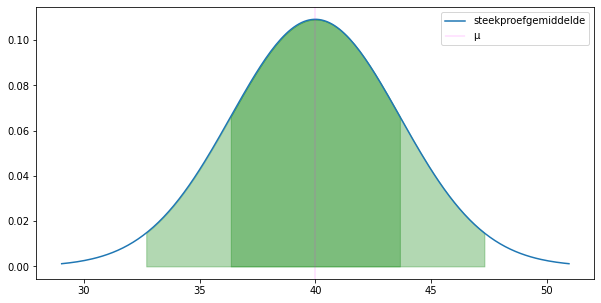

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

%matplotlib inline

# variabele om plot van grafiek te maken
x = np.linspace(μ - 3 * se, μ + 3 * se, 200)
# twee intervallen a en b
a = np.linspace(μ - 2 * se, μ + 2 * se)
b = np.linspace(μ - 1 * se, μ + 1 * se)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(x, steekproefverdeling.pdf(x), label='steekproefgemiddelde')
ax.axvline(x=μ, color='magenta', label='µ', linewidth=0.2)
ax.fill_between(a, steekproefverdeling.pdf(a), edgecolor='black', color='green', alpha=0.3)
ax.fill_between(b, steekproefverdeling.pdf(b), edgecolor='black', color='green', alpha=0.3)
ax.legend()

print("Kans op gemiddeld verbruik tussen 20 en 30 is {:.3f}".format(
    steekproefverdeling.cdf(30) - steekproefverdeling.cdf(20)))
print("Kans op verbruik tussen 30 en 50 is {:.3f}".format(verbruik.cdf(50) - verbruik.cdf(30)))
print("Kans op gemiddeld verbruik tussen 35 en 45 is {:.3f}".format(
    steekproefverdeling.cdf(45) - steekproefverdeling.cdf(35)))

## Met $\bar{X} \sim N(0,1)$

Hoe berekenen we een betrouwbaarheidsinterval wanneer we werken met een standaardnormale verdeling?

### Transformatie van toevalsveranderlijke

#### Z-score transformatie
$Z = \frac{X - \mu}{\sigma}$

#### Inverse transformatie

$X = Z \cdot \sigma + \mu$

In [5]:
μ = 40  # populatiegemiddelde
σ = 20  # standaardafwijking

x = 80  # één specifieke observatie
z = (x - μ) / σ  # z-score van x

x = z * σ + μ  # inversie transformatie

print(f'x={x} =transformatie=> z={z} =inverse transformatie=> z*σ + µ = {z * σ + μ}=x')

x=80.0 =transformatie=> z=2.0 =inverse transformatie=> z*σ + µ = 80.0=x


In [6]:
import pandas as pd

x = np.arange(20, 100, 1)
z = (x - μ) / σ
pd.DataFrame(zip(x, z), columns=['x', 'z']).transpose()

0      1     2      3     4      5     6      7     8      9   ...    70  \
x  20.0  21.00  22.0  23.00  24.0  25.00  26.0  27.00  28.0  29.00  ...  90.0   
z  -1.0  -0.95  -0.9  -0.85  -0.8  -0.75  -0.7  -0.65  -0.6  -0.55  ...   2.5   

      71    72     73    74     75    76     77    78     79  
x  91.00  92.0  93.00  94.0  95.00  96.0  97.00  98.0  99.00  
z   2.55   2.6   2.65   2.7   2.75   2.8   2.85   2.9   2.95  

[2 rows x 80 columns]

### Onder -en bovengrens berekenen

De factor $f$ die we nodig hebben om een betrouwbaarheidsinterval te berekenen kunnen we weer vinden met `norm.ppf`, **maar** we moet de inverse transformatie nog toepassen.

In [7]:
# betrouwbaarheidsinterval van
b = 0.95

# steekproefverdeling is nu standaardnormaal
steekproefverdeling = norm()

# grens berekenen m.b.v. factor f (algemene manier)
f1, f2 = steekproefverdeling.ppf([(1 - b) / 2, (1 + b) / 2])
print(f'f1 = {f1:.3f}, f2 = {f2:.3f}')

# inverse transformatie
x_bar = 40
x1 = se * f1 + x_bar
x2 = se * f2 + x_bar

print(f'x1 = {x1:.3f}, x2 = {x2:.3f}')

f1 = -1.960, f2 = 1.960
x1 = 32.843, x2 = 47.157


### Verduidelijking met figuur

array([-1.95996398,  1.95996398])

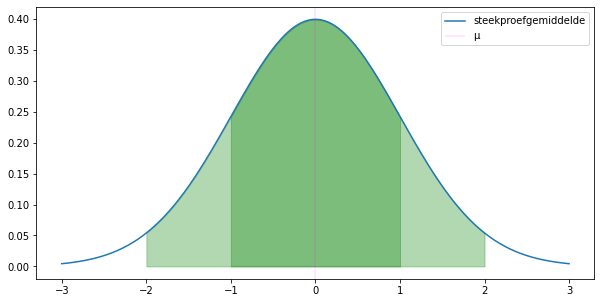

In [8]:
x_bar = 0
σ = 1

steekproefverdeling = norm()

x = np.linspace(x_bar - 3 * σ, x_bar + 3 * σ, 200)
a = np.linspace(x_bar - 2 * σ, x_bar + 2 * σ)
b = np.linspace(x_bar - 1 * σ, x_bar + 1 * σ)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(x, steekproefverdeling.pdf(x), label='steekproefgemiddelde')
ax.axvline(x=x_bar, color='magenta', label='µ', linewidth=0.2)
ax.fill_between(a, steekproefverdeling.pdf(a), edgecolor='black', color='green', alpha=0.3)
ax.fill_between(b, steekproefverdeling.pdf(b), edgecolor='black', color='green', alpha=0.3)
_ = ax.legend()

b = 0.95
α = 1 - b

steekproefverdeling.ppf(q=[α / 2, 1 - α / 2])


## Voor studentverdeling

Wanneer gebruiken we voor $\bar{X}$ een Studentverdeling i.p.v. een (standaard)normale verdeling?

* Indien we $\sigma$ door s benaderen, omdat we $\sigma$ niet kennen OF
* Als n klein is (<30)

In die gevallen is de normale verdeling een slechte benadering, en daarom gebruik je beter de Student t-verdeling

Kans op verbruik tussen 20 en 30 is 0.148
Kans op verbruik tussen 30 en 50 is 0.379
Kans op verbruik tussen 0 en 80 is 0.945


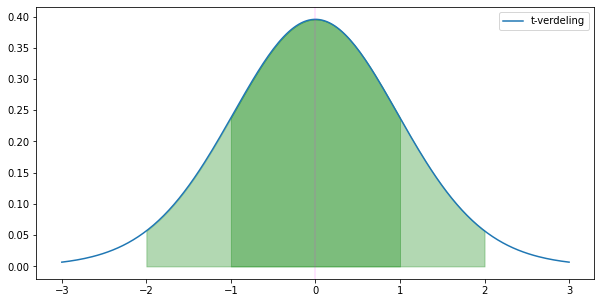

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import t

x_bar = 0
s = 1

# steekproefverdeling is Student - verdeling
steekproefverdeling = t(n - 1)

t = np.linspace(x_bar - 3 * s, x_bar + 3 * s, 200)
a = np.linspace(x_bar - 2 * s, x_bar + 2 * s, 200)
b = np.linspace(x_bar - 1 * s, x_bar + 1 * s, 200)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(t, steekproefverdeling.pdf(t), label='t-verdeling')
ax.axvline(x=x_bar, color='magenta', linewidth=0.2)
ax.fill_between(a, steekproefverdeling.pdf(a), edgecolor='black', color='green', alpha=0.3)
ax.fill_between(b, steekproefverdeling.pdf(b), edgecolor='black', color='green', alpha=0.3)

ax.legend()

# Voorbeeld van de laptops gold
x_bar = 40
n = 30
s = 20

# we moeten nu t-scores (eigenlijk zijn dit gewoon z-scores) gebruiken, want Student-verdeling is gecentreerd rond 0
t1 = (20 - x_bar) / s
t2 = (30 - x_bar) / s

print("Kans op verbruik tussen 20 en 30 is {:.3f}".format(steekproefverdeling.cdf(t2) - steekproefverdeling.cdf(t1)))
t1 = (30 - x_bar) / s
t2 = (50 - x_bar) / s
print("Kans op verbruik tussen 30 en 50 is {:.3f}".format(steekproefverdeling.cdf(t2) - steekproefverdeling.cdf(t1)))
t1 = (0 - x_bar) / s
t2 = (80 - x_bar) / s
print("Kans op verbruik tussen 0 en 80 is {:.3f}".format(steekproefverdeling.cdf(t2) - steekproefverdeling.cdf(t1)))

### Voor n laptops

We gaan er dus nu van uit dat we $\sigma$ niet kennen, maar dat we enkel de standaardafwijking $s$ kennen.

<u>Toevalsveranderdelijke</u>:

$\bar{X}$ = "Het gemiddeld verbruik van laptops in steekproef met grootte n"

We testen 30 laptops. 
Ondanks dat de centrale limietstelling stelt dat $\bar{X}$ normaalverdeeld is met parameters:

* gemiddelde is $\mu = 40$ Watt
* standaard error $se = \frac{σ}{\sqrt{n}} =  \frac{20}{\sqrt{30}}$ Watt

gebruiken we **ditmaal** toch een studentverdeling: $\bar{X} \sim t(30-1)$

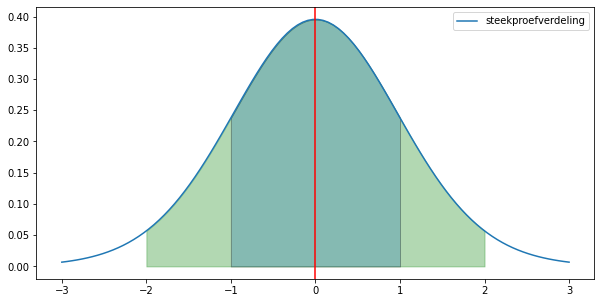

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import t

n = 30

steekproefverdeling = t(n - 1)

x = np.linspace(-3, 3, 100)
a = np.linspace(-1, 1, 100)
b = np.linspace(0 - 2 * 1, 0 + 2 * 1)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(x, steekproefverdeling.pdf(x), label='steekproefverdeling')
ax.axvline(x=0, color='red')
ax.fill_between(b, steekproefverdeling.pdf(b), edgecolor='black', color='green', alpha=0.3)
ax.fill_between(a, steekproefverdeling.pdf(a), edgecolor='black', alpha=0.3)
_ = ax.legend()

# print("Kans op gemiddeld verbruik tussen 20 en 30 is {:.3f}".format(steekproefverdeling.cdf(30) - steekproefverdeling.cdf(20)))
# print("Kans op verbruik tussen 30 en 50 is {:.3f}".format(verbruik.cdf(50) - verbruik.cdf(30)))
# print("Kans op gemiddeld verbruik tussen 0 en 80 is {:.3f}".format(steekproefverdeling.cdf(80) - steekproefverdeling.cdf(0)))

### Bij studentverdelingen

In [11]:
standaardnormaal = norm()
normaal = norm(loc=μ, scale=σ)
student = t(n - 1)
intervallen = [0.9, 0.95, 0.955, 0.99]

for b in intervallen:
    lg = (1 - b) / 2
    rg = (1 + b) / 2

    print(f'Factoren voor betrouwbaarheidsinterval van {b * 100 :.1f}%\n')
    print("Met Z-scores: ", standaardnormaal.ppf(q=[lg, rg]))
    print("Met t-scores:", student.ppf(q=[lg, rg]))
    print("Met normale verdeling:", normaal.ppf(q=[lg, rg]))
    print()


Factoren voor betrouwbaarheidsinterval van 90.0%

Met Z-scores:  [-1.64485363  1.64485363]
Met t-scores: [-1.69912703  1.69912703]
Met normale verdeling: [38.35514637 41.64485363]

Factoren voor betrouwbaarheidsinterval van 95.0%

Met Z-scores:  [-1.95996398  1.95996398]
Met t-scores: [-2.04522964  2.04522964]
Met normale verdeling: [38.04003602 41.95996398]

Factoren voor betrouwbaarheidsinterval van 95.5%

Met Z-scores:  [-2.00465446  2.00465446]
Met t-scores: [-2.0951815  2.0951815]
Met normale verdeling: [37.99534554 42.00465446]

Factoren voor betrouwbaarheidsinterval van 99.0%

Met Z-scores:  [-2.5758293  2.5758293]
Met t-scores: [-2.7563859  2.7563859]
Met normale verdeling: [37.4241707 42.5758293]

